In [1]:
# Import necessary library
import pandas as pd

# Reload the data from the CSV file
data = pd.read_csv("second_part.csv")

In [5]:
import numpy as np
from sklearn.svm import SVR  # For regression tasks
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [6]:
features = ['ENVIRON_DISCLOSURE_SCORE', 'SOCIAL_DISCLOSURE_SCORE', 'GOVNCE_DISCLOSURE_SCORE', 'ESG_DISCLOSURE_SCORE']
target = 'EBITDA_CAGR'


In [8]:
X = data[features].values
y = data[target].values

In [9]:
svm_model = SVR(kernel='rbf')  # Using RBF kernel
svm_model.fit(X, y)


SVR()

In [10]:
import joblib

In [11]:
# Save the model to a file
joblib.dump(svm_model, 'new_svm_model.joblib')

['new_svm_model.joblib']

In [ ]:
# Load the model from the file
svm_model_loaded = joblib.load('new_svm_model.joblib')

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
import shutil

# Path in Google Colab
source_path = 'new_svm_model.joblib'

destination_path = '/content/drive/MyDrive/ColabNotebooks/new_svm_model.joblib'

shutil.copy(source_path, destination_path)

'/content/drive/MyDrive/ColabNotebooks/new_svm_model.joblib'

In [14]:
# load the test data
test_data = pd.read_csv("first_part.csv")

test_features = test_data[features].values
test_target = test_data['EBITDA_CAGR'].values

In [15]:
features = ['ENVIRON_DISCLOSURE_SCORE', 'SOCIAL_DISCLOSURE_SCORE', 'GOVNCE_DISCLOSURE_SCORE', 'ESG_DISCLOSURE_SCORE']
target = 'EBITDA_CAGR'

In [16]:
test_X = test_data[features].values
test_y = test_data[target].values

test_predictions = svm_model.predict(test_X)

# Evaluate the model on the new dataset
test_mse = mean_squared_error(test_y, test_predictions)
test_r2 = r2_score(test_y, test_predictions)
mae = mean_absolute_error(test_y, test_predictions)

print(f"New Data - Mean Squared Error: {test_mse}")
print(f"New Data - R^2 Score: {test_r2}")
print(f"New Data - Meaan Absolute Error: {mae}")


New Data - Mean Squared Error: 0.02137342761354317
New Data - R^2 Score: -0.07220152415035774
New Data - Meaan Absolute Error: 0.07024753355811303


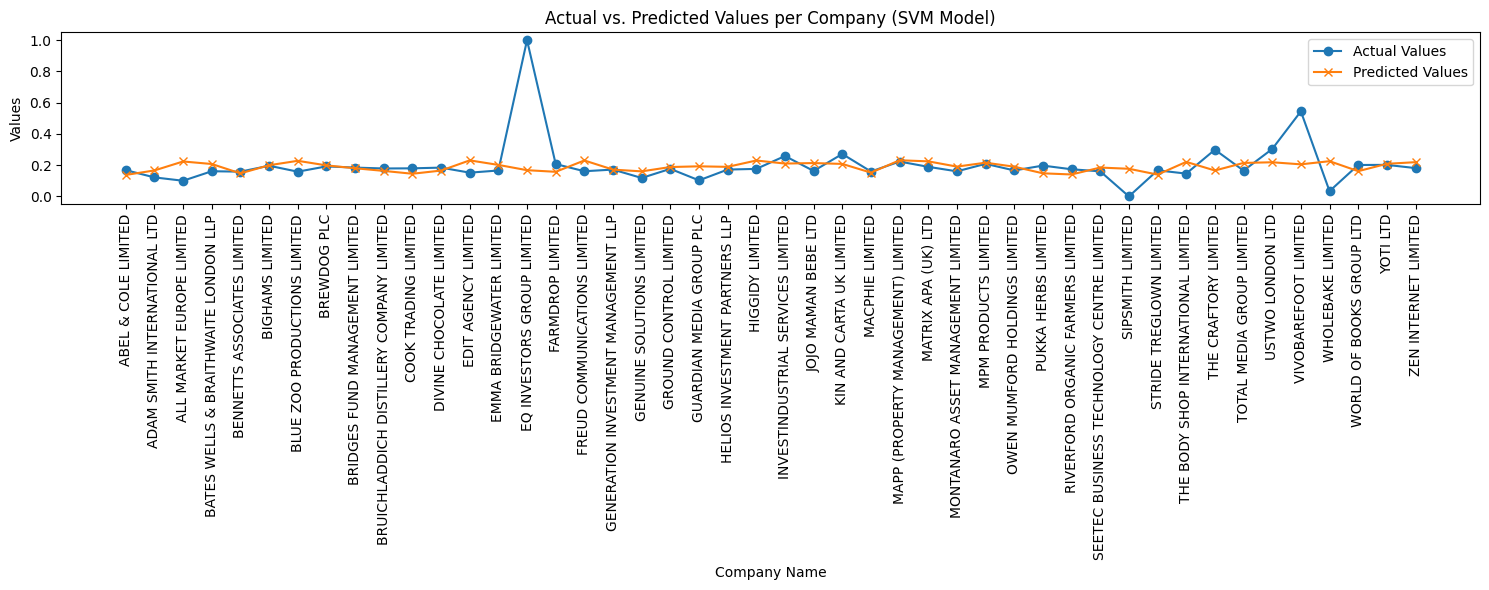

In [20]:
import matplotlib.pyplot as plt

company_names = test_data['Name']

plt.figure(figsize=(15, 6))
plt.plot(company_names, test_y, label='Actual Values', marker='o')
plt.plot(company_names, test_predictions, label='Predicted Values', marker='x')
plt.xticks(rotation=90)
plt.title('Actual vs. Predicted Values per Company (SVM Model)')
plt.xlabel('Company Name')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()


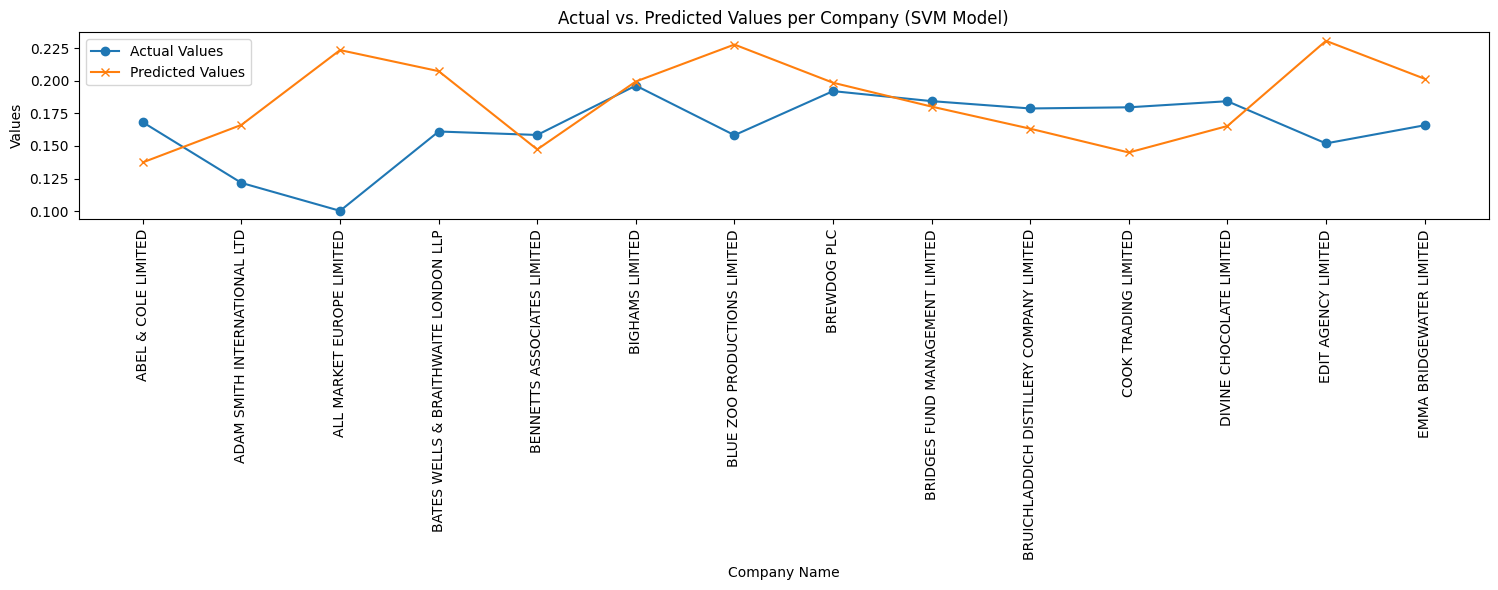

In [21]:
import matplotlib.pyplot as plt

company_names = test_data['Name']

plt.figure(figsize=(15, 6))
plt.plot(company_names[:14], test_y[:14], label='Actual Values', marker='o')
plt.plot(company_names[:14], test_predictions[:14], label='Predicted Values', marker='x')
plt.xticks(rotation=90)
plt.title('Actual vs. Predicted Values per Company (SVM Model)')
plt.xlabel('Company Name')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Convert predictions to a DataFrame
predicted_values_df = pd.DataFrame(test_predictions, columns=['Predicted_EBITDA_CAGR'])

In [ ]:
# Convert test data to DataFrame
test_X_df = pd.DataFrame(test_X, columns=features)


In [ ]:
# Concatenate the predictions with the test data
test_data_with_predictions = pd.concat([test_X_df, predicted_values_df], axis=1)


In [ ]:
print(test_data_with_predictions)


    ENVIRON_DISCLOSURE_SCORE  SOCIAL_DISCLOSURE_SCORE  \
0                   0.838462                 0.142529   
1                   0.000000                 0.977011   
2                   0.330769                 0.117241   
3                   0.310256                 0.442529   
4                   0.794872                 0.420690   
5                   0.441026                 0.075862   
6                   0.166667                 0.226437   
7                   0.443590                 0.065517   
8                   0.269231                 0.806897   
9                   0.643590                 0.075862   
10                  0.558974                 0.240230   
11                  0.320513                 0.650575   
12                  0.161538                 0.178161   
13                  0.423077                 0.083908   
14                  0.046154                 1.000000   
15                  1.000000                 0.000000   
16                  0.174359   

In [ ]:
# Save the data to a new CSV file
Collapsed_SVM_Predict = 'Collapsed_SVM_Predict.csv'
test_data_with_predictions.to_csv(Collapsed_SVM_Predict, index=False)

In [ ]:
from google.colab import files
files.download('Collapsed_SVM_Predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>